In [1]:
import pandas as pd
import numpy as np
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from header import *

In [2]:
data_root = initialize_data_root("AH")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

## Import

In [33]:
q3mergeddata = pd.read_csv(data_root + '02-build/clean/2019q3/q32019imputeddata.csv')

## Interaction Term

In [10]:
q3mergeddata['Clean_Number_of_Shares'] =q3mergeddata[['WeightedAverageNumberOfDilutedSharesOutstanding',
       'WeightedAverageNumberOfSharesOutstandingBasic']].max(axis = 1)

q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['Clean_Number_of_Shares',
                                                       'CommonStockSharesOutstanding']].max(axis = 1)

q3mergeddata['Company_Value'] = q3mergeddata['Clean_Number_of_Shares'] * q3mergeddata['7_after']
q3mergeddata = q3mergeddata.drop(q3mergeddata[q3mergeddata.Company_Value == 0].index)
q3mergeddata = q3mergeddata.drop(['CommonStockSharesOutstanding','WeightedAverageNumberOfDilutedSharesOutstanding','WeightedAverageNumberOfSharesOutstandingBasic' ], axis = 1)
q3mergeddata['Company_Size'] = np.where(q3mergeddata['Company_Value'] > 5000000000, 1, 0)


q3mergeddata_it = q3mergeddata.copy().loc[q3mergeddata.StockholdersEquity != 0 ]



for i in q3mergeddata_it.columns[11:len(q3mergeddata_it.columns) - 17]:
    q3mergeddata_it[i + '_it'] = q3mergeddata_it[i]/q3mergeddata_it.StockholdersEquity

q3mergeddata_it = q3mergeddata_it.drop(['7_before', '7_after', 'difference', 'per', 'Clean_Number_of_Shares', 'Company_Value', 'Company_Size'], axis = 1)

q3mergeddata_it.reset_index()
interaction_term_processed = pd.DataFrame(preprocessing.scale(q3mergeddata_it[q3mergeddata_it.columns[11:]]), columns = q3mergeddata_it.columns[11:])


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


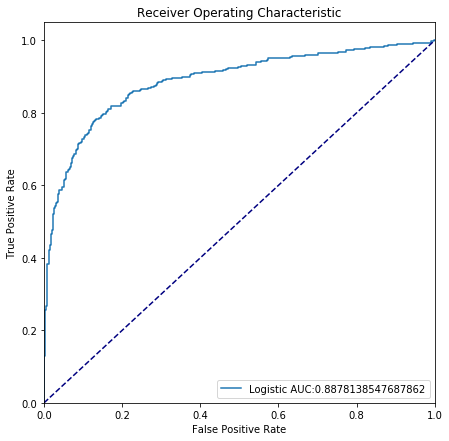

In [11]:
X = pd.DataFrame(interaction_term_processed.copy())
Y = pd.DataFrame(q3mergeddata.copy().loc[q3mergeddata.StockholdersEquity != 0 ]['Company_Size'].copy())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

plt.figure(figsize = (7, 7))
plt.plot(log_fpr, log_tpr, label = 'Logistic AUC:'+str(log_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

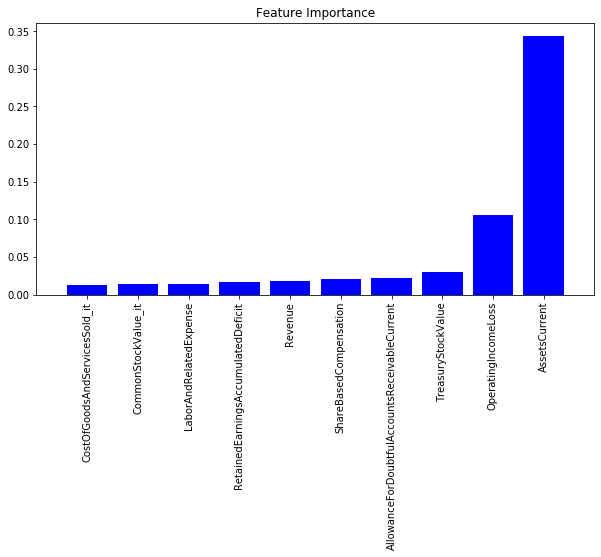

In [14]:
X_dt = pd.DataFrame(interaction_term_processed.copy())
Y_dt = pd.DataFrame(q3mergeddata.copy().loc[q3mergeddata.StockholdersEquity != 0 ]['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X_dt,Y_dt, test_size = 0.30)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

## No Interaction terms rerun import before doing any of this

In [16]:
q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['WeightedAverageNumberOfDilutedSharesOutstanding',
       'WeightedAverageNumberOfSharesOutstandingBasic']].max(axis = 1)

q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['Clean_Number_of_Shares',
                                                       'CommonStockSharesOutstanding']].max(axis = 1)

q3mergeddata['Company_Value'] = q3mergeddata['Clean_Number_of_Shares'] * q3mergeddata['7_after']
q3mergeddata = q3mergeddata.drop(q3mergeddata[q3mergeddata.Company_Value == 0].index)
q3mergeddata = q3mergeddata.drop(['CommonStockSharesOutstanding','WeightedAverageNumberOfDilutedSharesOutstanding','WeightedAverageNumberOfSharesOutstandingBasic' ], axis = 1)
q3mergeddata['Company_Size'] = np.where(q3mergeddata['Company_Value'] > 5000000000, 1, 0)

In [17]:
q3mergeddata_processed  = pd.DataFrame(preprocessing.scale(q3mergeddata[q3mergeddata.columns[11:len(q3mergeddata.columns) - 7]]), columns =q3mergeddata.columns[11:len(q3mergeddata.columns) - 7] )

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [18]:
X = pd.DataFrame(q3mergeddata_processed.copy())
Y = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))

log_decision = logreg.decision_function(X_test)
log_fpr, log_tpr, _  = roc_curve(Y_test, log_decision)

log_auc = auc(log_fpr, log_tpr)

lin_svm = SVC(kernel = 'linear')
lin_svm.fit(X_train, np.ravel(Y_train))

svm_decision = lin_svm.decision_function(X_test)
svm_fpr, svm_tpr, _  = roc_curve(Y_test, svm_decision)

svm_auc = auc(svm_fpr, svm_tpr)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


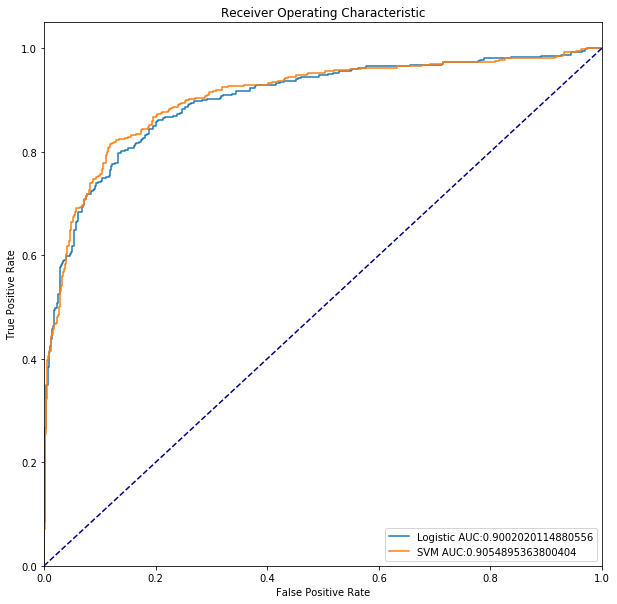

In [20]:
plt.figure(figsize = (10, 10))
plt.plot(log_fpr, log_tpr, label = 'Logistic AUC:'+str(log_auc))
plt.plot(svm_fpr, svm_tpr, label = 'SVM AUC:'+str(svm_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

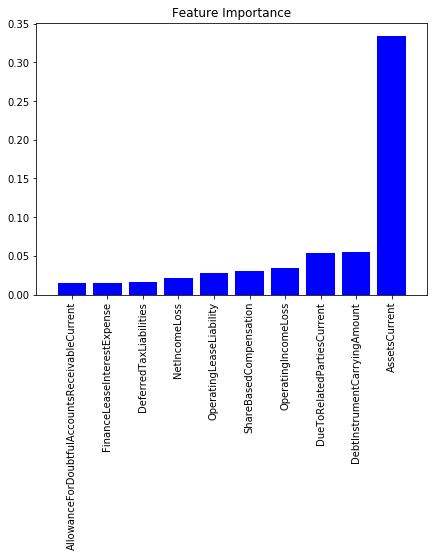

In [29]:
X_dt = pd.DataFrame(q3mergeddata_processed.copy())
Y_dt = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X_dt,Y_dt, test_size = 0.30)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(7,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

## Nonbinary Company Size

In [34]:
q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['WeightedAverageNumberOfDilutedSharesOutstanding',
       'WeightedAverageNumberOfSharesOutstandingBasic']].max(axis = 1)

q3mergeddata['Clean_Number_of_Shares'] = q3mergeddata[['Clean_Number_of_Shares',
                                                       'CommonStockSharesOutstanding']].max(axis = 1)

q3mergeddata['Company_Value'] = q3mergeddata['Clean_Number_of_Shares'] * q3mergeddata['7_after']
q3mergeddata = q3mergeddata.drop(q3mergeddata[q3mergeddata.Company_Value == 0].index)
q3mergeddata = q3mergeddata.drop(['CommonStockSharesOutstanding','WeightedAverageNumberOfDilutedSharesOutstanding','WeightedAverageNumberOfSharesOutstandingBasic' ], axis = 1)
q3mergeddata['Company_Size_1'] = np.where(q3mergeddata['Company_Value'] <= 2000000000, 1, 0)
q3mergeddata['Company_Size_2'] = np.where(q3mergeddata['Company_Value'] >= 5000000000, 2, 1)
q3mergeddata['Company_Size'] = q3mergeddata['Company_Size_2'] - q3mergeddata['Company_Size_1']

q3mergeddata = q3mergeddata.drop(['Company_Size_1','Company_Size_2'], axis = 1)

q3mergeddata_processed  = pd.DataFrame(preprocessing.scale(q3mergeddata[q3mergeddata.columns[11:len(q3mergeddata.columns) - 7]]), columns =q3mergeddata.columns[11:len(q3mergeddata.columns) - 7] )



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


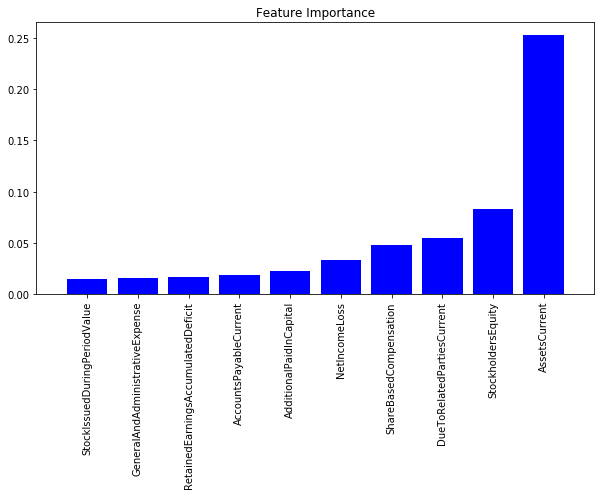

In [35]:
X_dt = pd.DataFrame(q3mergeddata_processed.copy())
Y_dt = pd.DataFrame(q3mergeddata['Company_Size'].copy())

X_train, X_test, Y_train, Y_test = train_test_split(X_dt,Y_dt, test_size = 0.30)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

importance = dt.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

In [36]:
dt.score(X_test, Y_test)

0.6845943482224248

## Random Forest

In [37]:
clf = RandomForestClassifier(criterion = 'entropy')
clf.fit(X_train, np.ravel(Y_train))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

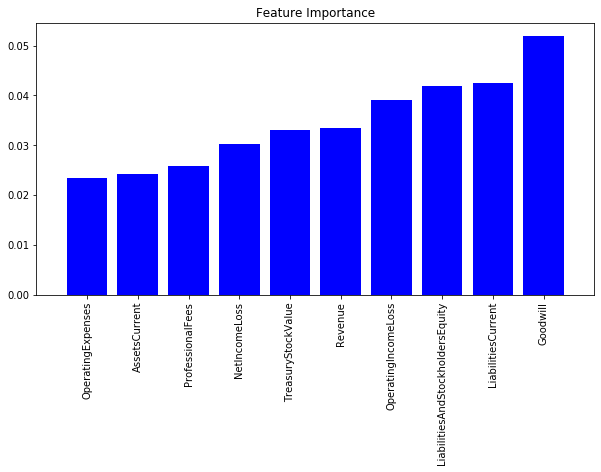

In [38]:
importance = clf.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(X_train.columns[indices][- 10:], importance[indices][- 10:], 
        color = 'b', align = 'center')
plt.xticks(range(10), X.columns[indices][-10:], rotation = 90)
plt.xlim([-1, 10])
plt.show()

In [39]:
clf.score(X_test, Y_test)

0.7575205104831358